## surface flux variables (SF)

Developent of mse

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \hat{h^ \prime} \ \text{NetLW} + \hat{h^ \prime} \ \textcolor{lightblue}{\text{SEF}} - \hat{h^ \prime} \ \text{NetSW} + \hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$

$\textcolor{lightblue}{\text{SEF}} = \textcolor{lightblue}{\text{hfls}} + \textcolor{lightblue}{\text{hfss}} $


1. hfls  –  heat flux latent surface 
2. hfss  –  heat flux sensible surface

<br />

In [1]:
import intake
import xarray as xr
import xesmf as xe

import numpy as np
import skimage.measure as skm

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os
import myFuncs
import myPlots

In [2]:
model='MPI-ESM1-2-HR'
experiment_id='historical'
period = slice('1970-01-01','1999-12-31')
member_id='r1i1p1f1'


## hfls  –  heat flux latent surface

In [4]:
table_id='day'
variable_id = 'hfls'
ds_dict= intake.cat.nci['esgf'].cmip6.search(
                                source_id=model, 
                                experiment_id=experiment_id, 
                                member_id=member_id, 
                                variable_id=variable_id, 
                                table_id=table_id).to_dataset_dict()

ds = ds_dict[list(ds_dict.keys())[-1]].sel(time=period, lon=slice(0,360),lat=slice(-30,30))

In [ ]:
ds

In [7]:
hfls=ds.hfls
hfls

<xarray.DataArray 'hfls' (time: 10957, lat: 64, lon: 384)>
dask.array<getitem, shape=(10957, 64, 384), dtype=float32, chunksize=(1827, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  surface_upward_latent_heat_flux
    long_name:      Surface Upward Latent Heat Flux
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:13Z altered by CMOR: Changed sign. 2019-...

In [8]:
hfls_test=hfls.isel(time=slice(0,4))
hfls_test

<xarray.DataArray 'hfls' (time: 4, lat: 64, lon: 384)>
dask.array<getitem, shape=(4, 64, 384), dtype=float32, chunksize=(4, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-01-04T12:00:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  surface_upward_latent_heat_flux
    long_name:      Surface Upward Latent Heat Flux
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:13Z altered by CMOR: Changed sign. 2019-...

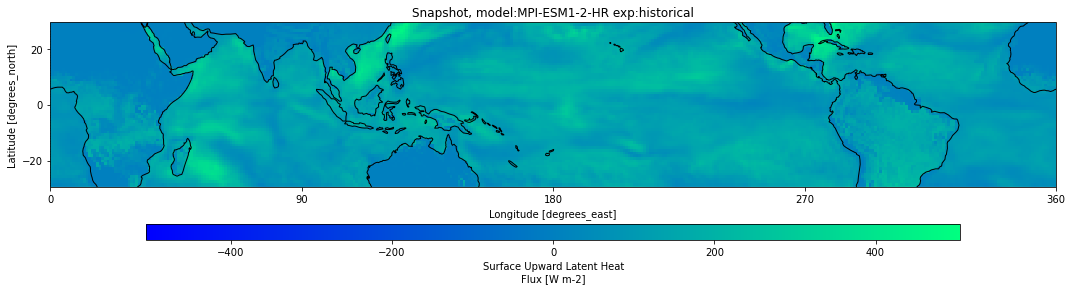

In [9]:
myPlots.plot_snapshot(hfls.isel(time=0), 'winter')

In [ ]:
del ds

## hfss  –  heat flux sensible surface

In [10]:
table_id='day'
variable_id = 'hfss'
ds_dict= intake.cat.nci['esgf'].cmip6.search(
                                source_id=model, 
                                experiment_id=experiment_id, 
                                member_id=member_id, 
                                variable_id=variable_id, 
                                table_id=table_id).to_dataset_dict()

ds = ds_dict[list(ds_dict.keys())[-1]].sel(time=period, lon=slice(0,360),lat=slice(-30,30))

In [ ]:
ds

In [13]:
hfss=ds.hfss
hfss

<xarray.DataArray 'hfss' (time: 10957, lat: 64, lon: 384)>
dask.array<getitem, shape=(10957, 64, 384), dtype=float32, chunksize=(1827, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  surface_upward_sensible_heat_flux
    long_name:      Surface Upward Sensible Heat Flux
    comment:        The surface sensible heat flux, also called turbulent hea...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:13Z altered by CMOR: Changed sign. 2019-...

In [14]:
hfss_test=hfss.isel(time=slice(0,4))
hfss_test

<xarray.DataArray 'hfss' (time: 4, lat: 64, lon: 384)>
dask.array<getitem, shape=(4, 64, 384), dtype=float32, chunksize=(4, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-01-04T12:00:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  surface_upward_sensible_heat_flux
    long_name:      Surface Upward Sensible Heat Flux
    comment:        The surface sensible heat flux, also called turbulent hea...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:13Z altered by CMOR: Changed sign. 2019-...

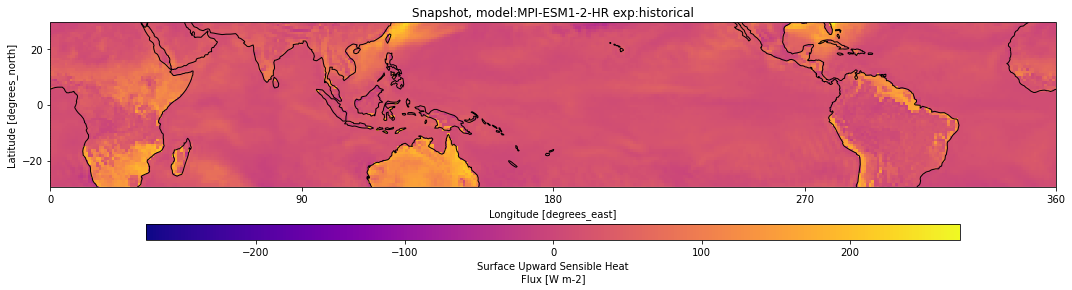

In [15]:
myPlots.plot_snapshot(hfss.isel(time=0), 'plasma')

## sef

In [ ]:
netsef_test = hfls_test + hfss_test

In [ ]:
netsef = hfls + hfss

In [ ]:
netsef_tMean = netsef.mean(dim = 'time', keep_attrs=True)

In [ ]:
aWeights = np.cos(np.deg2rad(netsef.lat))
netsef_sMean = netsef.weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True)

In [ ]:
netsef_anom = netsef - netsef_sMean

## saving

In [16]:
del hfls_test.encoding['chunksizes']
del hfss_test.encoding['chunksizes']

In [18]:
# surface fluxes test
save = True
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    fileName = model + '_sef_' + experiment_id + '.nc'
    dataSet = xr.Dataset({'netsef_test': netsef_test, 
                'hfls_test': hfls_test, 
                'hfss_test': hfss_test})

    myFuncs.save_file(dataSet, folder, fileName)

In [ ]:
# surface flux tMean
save = True
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    fileName = model + '_sef_tMean_' + experiment_id + '.nc'  
    dataSet = xr.Dataset({'netsef_tMean': netsef_tMean})

    myFuncs.save_file(dataSet, folder, fileName)

In [ ]:
# surface flux sMean
save = True
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    os.makedirs(folder, exist_ok=True)

    fileName = model + '_sef_sMean_' + experiment_id + '.nc'
    path = folder + '/' + fileName
    if os.path.exists(path):
        os.remove(path)    

    xr.Dataset({'netsef_sMean': netsef_sMean}).to_netcdf(path)

In [ ]:
# surface flux anomaly from mean
save = True
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    fileName = model + '_sef_anom_' + experiment_id + '.nc' 
    dataSet = xr.Dataset({
            'netsef_anom': netsef_anom.weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True),
            'netsef_sMean': netsef_sMean})

    myFuncs.save_file(dataSet, folder, fileName)

## checking